<a href="https://colab.research.google.com/github/kikosikera/2019_10_12_dta/blob/master/2019_10_12_dta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank CDM Data: A Decision Tree Approach

#### > Summary > Categorical Data > Classification > Build the Data Model > Predictions 

### A Data-Driven decision using a Classification Model
- The data is related with consumer direct marketing campaigns (phone calls) of a banking institution. 
- This study seeks results predicting if the client will subscribe (yes/no) to a term deposit through by building a Decision Tree.

In [0]:
# Source: https://archive.ics.uci.edu/ml/datasets.php
# Folder: 'Bank+Marketing'

### Import Libraries and Datasets

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Load dataset file
df_bank = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data/PROJ/2019_10_12_dta/Data/bank_cdm_dta.csv", sep = ',', low_memory=False)

In [7]:
df_bank.shape, list(df_bank), df_bank.notnull().sum()

((11162, 17),
 ['age',
  'job',
  'marital',
  'education',
  'default',
  'balance',
  'housing',
  'loan',
  'contact',
  'day',
  'month',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'poutcome',
  'deposit'],
 age          11162
 job          11162
 marital      11162
 education    11162
 default      11162
 balance      11162
 housing      11162
 loan         11162
 contact      11162
 day          11162
 month        11162
 duration     11162
 campaign     11162
 pdays        11162
 previous     11162
 poutcome     11162
 deposit      11162
 dtype: int64)

In [8]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Summary of data
- Input variables



### Categorical Variables :
<br>**[1] job      :** admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur,
               housemaid, unknown, self-employed, student
<br>**[2] marital  :** married, single, divorced
<br>**[3] education:** secondary, tertiary, primary, unknown
<br>**[4] default  :** yes, no
<br>**[5] housing  :** yes, no
<br>**[6] loan     :** yes, no 
<br>**[7] deposit  :** yes, no **(Dependent Variable)**
<br>**[8] contact  :** unknown, cellular, telephone
<br>**[9] month    :** jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec
<br>**[10] poutcome:** unknown, other, failure, success

### Numerical Variables:
**[1] age 
<br>[2] balance
<br>[3] day
<br>[4] duration
<br>[5] campaign
<br>[6] pdays
<br>[7] previous**

In [9]:
# Check if the data set contains any null values 
df_bank[df_bank.isnull().any(axis=1)].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


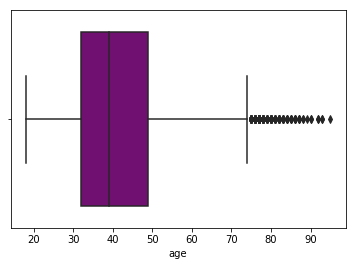

In [11]:
# Boxplot for 'age'
g = sns.boxplot(x=df_bank["age"], color="purple")

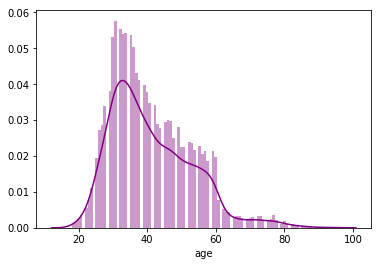

In [12]:
# Distribution of Age
sns.distplot(df_bank.age, bins=100, color="purple")

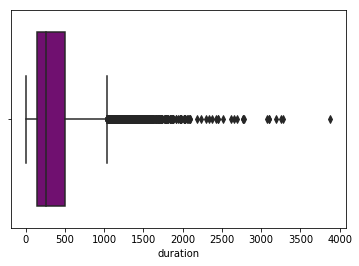

In [13]:
# Boxplot for 'duration'
g = sns.boxplot(x=df_bank["duration"], color="purple")

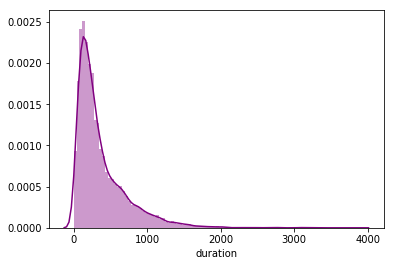

In [14]:
sns.distplot(df_bank.duration, bins=100, color="purple")

## Convert categorical data

In [0]:
# Make a df copy for parsing
df_bank_data = df_bank.copy()

#### 1. Job

In [16]:
df_bank_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [17]:
df_bank_data['job'].unique().tolist()

['admin.',
 'technician',
 'services',
 'management',
 'retired',
 'blue-collar',
 'unemployed',
 'entrepreneur',
 'housemaid',
 'unknown',
 'self-employed',
 'student']

In [18]:
# Explore People who made a deposit VS Job category
jobs = ['management','blue-collar','technician','admin.','services','retired','self-employed','student',\
        'unemployed','entrepreneur','housemaid','unknown']

for j in jobs:
    print("{:15} : {:5}". format(j, len(df_bank_data[(df_bank_data.deposit == "yes") & (df_bank_data.job ==j)])))

management      :  1301
blue-collar     :   708
technician      :   840
admin.          :   631
services        :   369
retired         :   516
self-employed   :   187
student         :   269
unemployed      :   202
entrepreneur    :   123
housemaid       :   109
unknown         :    34


In [19]:
# Different types of job categories and their counts
df_bank_data.job.value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [0]:
# Combine similar jobs into categories
df_bank_data['job'] = df_bank_data['job'].replace(['management', 'admin.'], 'white-collar')
df_bank_data['job'] = df_bank_data['job'].replace(['services','housemaid'], 'pink-collar')
df_bank_data['job'] = df_bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [21]:
# New value counts
df_bank_data.job.value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

#### 2. Poutcome

In [22]:
df_bank_data.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes


In [23]:
df_bank_data['poutcome'].unique().tolist()

['unknown', 'other', 'failure', 'success']

In [24]:
df_bank_data.poutcome.value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [25]:
# Combine 'unknown' and 'other' as 'other' isn't really match with either 'success' or 'failure'
df_bank_data['poutcome'] = df_bank_data['poutcome'].replace(['other'] , 'unknown')
df_bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

#### 3. Contact

In [26]:
df_bank_data['contact'].unique().tolist()

['unknown', 'cellular', 'telephone']

In [0]:
# Drop 'contact', as every participant has been contacted. 
df_bank_data.drop('contact', axis=1, inplace=True)

In [28]:
df_bank_data.head(3)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,white-collar,married,secondary,no,2343,yes,no,5,may,1042,1,-1,0,unknown,yes
1,56,white-collar,married,secondary,no,45,no,no,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389,1,-1,0,unknown,yes


#### 4. Default

In [29]:
df_bank_data['default'].unique().tolist()

['no', 'yes']

In [0]:
# values for "default" : yes/no
df_bank_data["default"]
df_bank_data['default_cat'] = df_bank_data['default'].map( {'yes':1, 'no':0} )
df_bank_data.drop('default', axis=1,inplace = True)

In [31]:
df_bank_data.head(3)

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat
0,59,white-collar,married,secondary,2343,yes,no,5,may,1042,1,-1,0,unknown,yes,0
1,56,white-collar,married,secondary,45,no,no,5,may,1467,1,-1,0,unknown,yes,0
2,41,technician,married,secondary,1270,yes,no,5,may,1389,1,-1,0,unknown,yes,0


#### 5. Housing

In [32]:
df_bank_data['housing'].unique().tolist()

['yes', 'no']

In [0]:
# values for "housing" : yes/no
df_bank_data["housing_cat"]=df_bank_data['housing'].map({'yes':1, 'no':0})
df_bank_data.drop('housing', axis=1,inplace = True)

In [34]:
df_bank_data.head(3)

,age,job,marital,education,balance,loan,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat
0,59,white-collar,married,secondary,2343,no,5,may,1042,1,-1,0,unknown,yes,0,1
1,56,white-collar,married,secondary,45,no,5,may,1467,1,-1,0,unknown,yes,0,0
2,41,technician,married,secondary,1270,no,5,may,1389,1,-1,0,unknown,yes,0,1


#### 6. Loan

In [35]:
df_bank_data['loan'].unique().tolist()

['no', 'yes']

In [0]:
# values for "loan" : yes/no
df_bank_data["loan_cat"] = df_bank_data['loan'].map({'yes':1, 'no':0})
df_bank_data.drop('loan', axis=1, inplace=True)

In [37]:
df_bank_data.head(3)

,age,job,marital,education,balance,day,month,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat,loan_cat
0,59,white-collar,married,secondary,2343,5,may,1042,1,-1,0,unknown,yes,0,1,0
1,56,white-collar,married,secondary,45,5,may,1467,1,-1,0,unknown,yes,0,0,0
2,41,technician,married,secondary,1270,5,may,1389,1,-1,0,unknown,yes,0,1,0


#### 7. Month, Day

In [38]:
# month: last contact month of year
df_bank_data['month'].unique().tolist()

['may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'jan',
 'feb',
 'mar',
 'apr',
 'sep']

In [39]:
# day  : last contact day of the month
df_bank_data['day'].unique().tolist()

[5,
 6,
 7,
 8,
 9,
 12,
 13,
 14,
 15,
 16,
 19,
 20,
 21,
 23,
 26,
 27,
 28,
 29,
 30,
 2,
 3,
 4,
 11,
 17,
 18,
 24,
 1,
 10,
 22,
 25,
 31]

In [0]:
# Drop 'month' and 'day' as they don't have any intrinsic meaning
df_bank_data.drop('month', axis=1, inplace=True)
df_bank_data.drop('day', axis=1, inplace=True)

In [41]:
df_bank_data.head(3)

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,deposit,default_cat,housing_cat,loan_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,yes,0,1,0
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,yes,0,0,0
2,41,technician,married,secondary,1270,1389,1,-1,0,unknown,yes,0,1,0


#### 8. Deposit

In [42]:
df_bank_data['deposit'].unique().tolist()

['yes', 'no']

In [0]:
# values for "deposit" : yes/no
df_bank_data["deposit_cat"] = df_bank_data['deposit'].map({'yes':1, 'no':0})
df_bank_data.drop('deposit', axis=1, inplace=True)

In [44]:
df_bank_data.head(3)

,age,job,marital,education,balance,duration,campaign,pdays,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat
0,59,white-collar,married,secondary,2343,1042,1,-1,0,unknown,0,1,0,1
1,56,white-collar,married,secondary,45,1467,1,-1,0,unknown,0,0,0,1
2,41,technician,married,secondary,1270,1389,1,-1,0,unknown,0,1,0,1


#### 9. Pdays

In [45]:
df_bank_data['pdays'].unique().tolist()

[-1,
 166,
 91,
 147,
 170,
 150,
 171,
 126,
 182,
 110,
 198,
 174,
 175,
 27,
 128,
 100,
 177,
 167,
 122,
 183,
 195,
 133,
 178,
 34,
 10,
 163,
 184,
 154,
 99,
 93,
 2,
 242,
 272,
 76,
 160,
 90,
 196,
 246,
 238,
 203,
 268,
 189,
 267,
 92,
 9,
 88,
 85,
 210,
 257,
 261,
 270,
 106,
 199,
 112,
 41,
 294,
 231,
 239,
 302,
 135,
 307,
 222,
 138,
 323,
 141,
 320,
 264,
 316,
 315,
 256,
 146,
 328,
 74,
 148,
 327,
 341,
 145,
 266,
 234,
 345,
 318,
 325,
 274,
 343,
 260,
 305,
 344,
 254,
 180,
 340,
 82,
 181,
 278,
 153,
 4,
 349,
 334,
 176,
 87,
 269,
 86,
 169,
 83,
 79,
 6,
 259,
 13,
 161,
 350,
 84,
 80,
 164,
 22,
 296,
 66,
 263,
 333,
 17,
 89,
 78,
 286,
 337,
 364,
 188,
 342,
 363,
 352,
 295,
 353,
 356,
 288,
 367,
 366,
 359,
 347,
 370,
 284,
 300,
 306,
 361,
 287,
 301,
 355,
 371,
 292,
 360,
 358,
 346,
 357,
 368,
 312,
 179,
 329,
 298,
 372,
 374,
 375,
 291,
 95,
 109,
 94,
 98,
 186,
 101,
 187,
 321,
 40,
 96,
 21,
 35,
 97,
 285,
 103,
 212,

In [46]:
# pdays: number of days that passed by after the client was last contacted from a previous campaign
#       -1 means client was not previously contacted

print("Customers that have not been contacted before:", len(df_bank_data[df_bank_data.pdays==-1]))
print("Maximum values on padys    :", df_bank_data['pdays'].max())

Customers that have not been contacted before: 8324
Maximum values on padys    : 854


In [0]:
# Map padys=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
df_bank_data.loc[df_bank_data['pdays'] == -1, 'pdays'] = 10000

In [0]:
# Create a new column: recent_pdays 
df_bank_data['recent_pdays'] = np.where(df_bank_data['pdays'], 1/df_bank_data.pdays, 1/df_bank_data.pdays)

# Drop 'pdays'
df_bank_data.drop('pdays', axis=1, inplace = True)

In [49]:
df_bank_data.head(3)

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
0,59,white-collar,married,secondary,2343,1042,1,0,unknown,0,1,0,1,0.0001
1,56,white-collar,married,secondary,45,1467,1,0,unknown,0,0,0,1,0.0001
2,41,technician,married,secondary,1270,1389,1,0,unknown,0,1,0,1,0.0001


In [50]:
df_bank_data.tail(3)

,age,job,marital,education,balance,duration,campaign,previous,poutcome,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays
11159,32,technician,single,secondary,29,156,2,0,unknown,0,0,0,0,0.000100
11160,43,technician,married,secondary,0,9,2,5,failure,0,0,1,0,0.005814
11161,34,technician,married,secondary,0,628,1,0,unknown,0,0,0,0,0.000100


#### 10. Convert to dummy values

In [51]:
# Convert categorical variables to dummies
df_bank_with_dummies = pd.get_dummies(data=df_bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])
df_bank_with_dummies.head()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1


In [52]:
df_bank_with_dummies.shape

(11162, 27)

In [53]:
df_bank_with_dummies.describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,371.993818,2.508421,0.832557,0.015051,0.473123,0.130801,0.473840,0.003124,0.174162,0.029385,0.140208,0.107239,0.036284,0.163322,0.349400,0.115839,0.568984,0.315176,0.134385,0.490593,0.330496,0.044526,0.110016,0.095951,0.794033
std,11.913369,3225.413326,347.128386,2.722077,2.292007,0.121761,0.499299,0.337198,0.499338,0.030686,0.379266,0.168892,0.347218,0.309431,0.187004,0.369676,0.476802,0.320047,0.495241,0.464607,0.341080,0.499934,0.470413,0.206270,0.312924,0.294537,0.404424
min,18.000000,-6847.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,550.000000,255.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,1708.000000,496.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.001919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,63.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 11. Observations on whole population

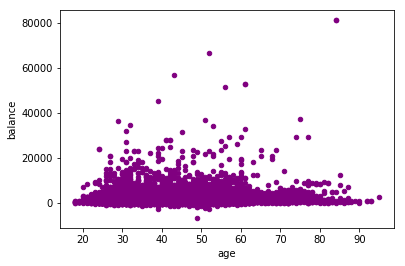

In [54]:
# Scatterplot showing age and balance
df_bank_with_dummies.plot(kind='scatter', x='age', y='balance', color="purple");

# Across all ages, majority of people have savings of less than 20000.

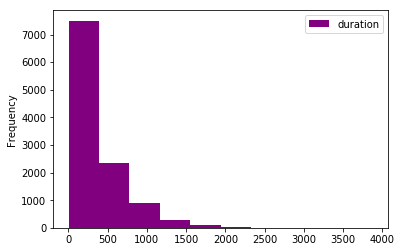

In [55]:
df_bank_with_dummies.plot(kind='hist', x='poutcome_success', y='duration', color="purple");

#### 12. Analysis on people who sign up for a term deposite

In [57]:
# People who sign up to a term deposite
df_bank_with_dummies[df_bank_data.deposit_cat == 1].describe()

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,0.133863,0.023256,0.193042,0.090376,0.035356,0.158820,0.365286,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.184912,0.698242
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,0.340537,0.150729,0.394723,0.286747,0.184696,0.365543,0.481556,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.388263,0.459064
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# People signed up to a term deposite having a Personal Loan (loan_cat) and Housing Loan (housing_cat)
len(df_bank_with_dummies[(df_bank_with_dummies.deposit_cat == 1) & (df_bank_with_dummies.loan_cat) & (df_bank_with_dummies.housing_cat)])

265

In [59]:
# People signed up to a term deposite with a Credit Default 
len(df_bank_with_dummies[(df_bank_with_dummies.deposit_cat == 1) & (df_bank_with_dummies.default_cat ==1)])

52

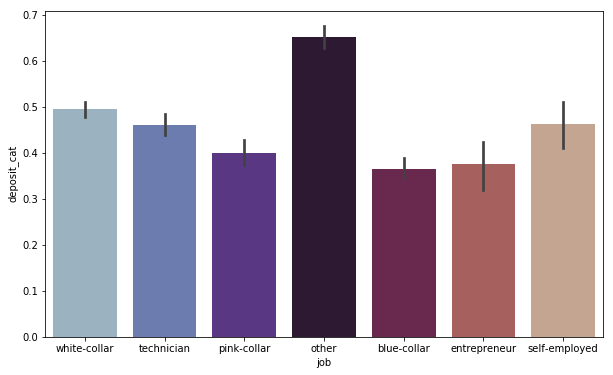

In [60]:
# Bar chart of Job VS Deposite
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit_cat', data = df_bank_data, palette="twilight", )


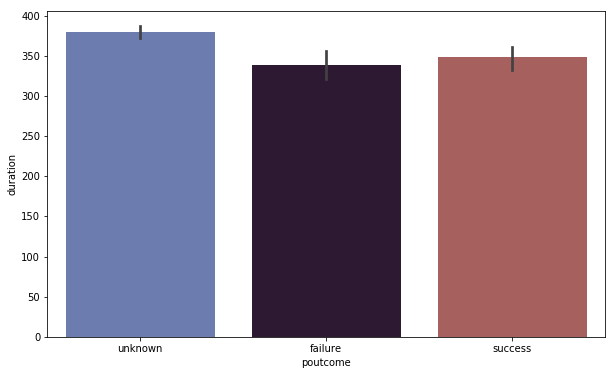

In [62]:
# Bar chart of "previous outcome" VS "call duration"

plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = df_bank_data, palette="twilight")

## Classification

In [0]:
# Make a copy
df_bank_class = df_bank_with_dummies.copy()

In [64]:
# Correltion Matrix
corr = df_bank_class.corr()
corr

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,job_blue-collar,job_entrepreneur,job_other,job_pink-collar,job_self-employed,job_technician,job_white-collar,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,-0.066567,0.024176,0.296418,-0.027942,-0.023163,-0.082716,-0.080122,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,0.062114,-0.038992
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,-0.046220,0.005039,0.050744,-0.041063,0.020264,0.003802,0.013780,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,0.045603,-0.034524
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,0.029986,-0.000908,0.010680,0.005345,0.013506,-0.010440,-0.031980,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,-0.022578,0.042725
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,0.005522,0.013883,-0.050212,0.011958,0.001776,0.021738,0.001944,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,-0.091807,0.128907
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,-0.039939,-0.022470,0.031191,-0.028623,-0.002338,0.002035,0.034929,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,0.325477,-0.496921
default_cat,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,0.022779,0.022060,-0.018130,-0.007173,0.007493,0.003109,-0.013425,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,-0.040272,0.048403
housing_cat,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,0.189848,0.011492,-0.233309,0.043884,-0.016903,0.006551,-0.012111,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,-0.136299,0.031375
loan_cat,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,0.057956,0.042631,-0.096196,0.014969,0.004299,0.006864,-0.007871,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,-0.080370,0.053686
deposit_cat,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,-0.100840,-0.034443,0.144408,-0.051717,-0.004707,-0.011557,0.031621,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,0.286642,-0.224785
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,-0.018514,0.006251,0.024356,-0.001183,-0.008226,-0.007412,0.004516,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,0.119598,-0.126890


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

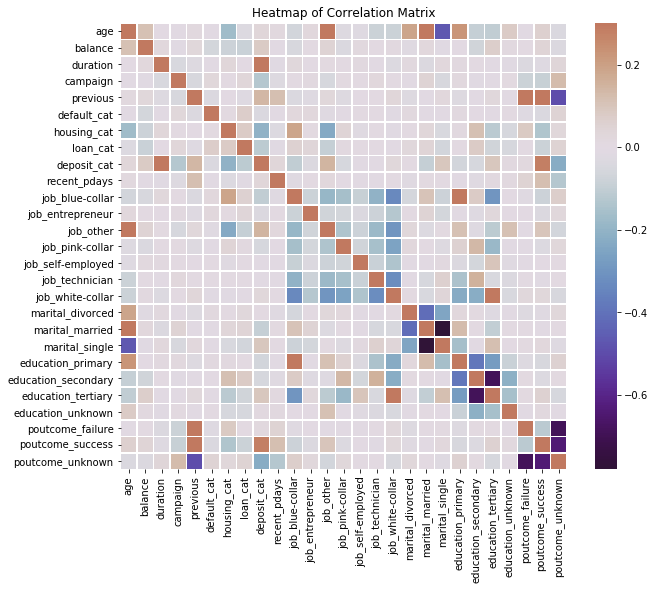

In [65]:
# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
cmap= "twilight_shifted"
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

In [66]:
# Extract the deposite_cat column (the dependent variable)
corr_deposite = pd.DataFrame(corr['deposit_cat'].drop('deposit_cat'))
corr_deposite.sort_values(by = 'deposit_cat', ascending = False)

,deposit_cat
duration,0.451919
poutcome_success,0.286642
job_other,0.144408
previous,0.139867
marital_single,0.094632
education_tertiary,0.094598
balance,0.081129
age,0.034901
recent_pdays,0.034457
job_white-collar,0.031621


## Build the Data Model

In [0]:
# Train-Test Split: 20% Test Data
data_drop_deposite = df_bank_class.drop('deposit_cat', 1)
label = df_bank_class.deposit_cat
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.2, random_state = 50)

In [79]:
# Decision Tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7285250307985217
Testing score:  0.7268248992386923


In [73]:
# Decision Tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.770411020271027
Testing score:  0.7572772055530677


In [74]:
# Decision Tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7885541494008288
Testing score:  0.774294670846395


In [78]:
# Decision Tree with depth = 5
dt5 = tree.DecisionTreeClassifier(random_state=1, max_depth=5)
dt5.fit(data_train, label_train)
dt5_score_train = dt5.score(data_train, label_train)
print("Training score: ",dt5_score_train)
dt5_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt5_score_test)

Training score:  0.7976257139657297
Testing score:  0.774294670846395


In [75]:
# Decision Tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8080412140217269
Testing score:  0.7796686072548141


In [76]:
# Decision tree: To the full depth
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7313031795790417


### Compare Training and Testing Scores for various Tree Depths used

In [80]:
print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(5, dt5_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))

depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7285250307985217   0.7268248992386923
3         0.770411020271027   0.7572772055530677
4        0.7885541494008288    0.774294670846395
5        0.7976257139657297    0.774294670846395
6        0.8080412140217269   0.7796686072548141
max                     1.0   0.7313031795790417


#### It could be seen that, higher the depth, training score increases and matches perfects with the Training Dataset.
#### However higher the depth the Tree goes, it overfit to the training Dataset. So it's no use keep increasing the Tree Depth. 
#### According to above observations, Tree with a Depth of 2 seems more reasonable as both training and Test Scores are reasonably high.

In [0]:
# Let's generate the Decision Tree for depth = 2
# Create a Feature Vector
features = df_bank_class.columns.tolist()

# Uncomment below to generate the digraph Tree.
# tree.export_graphviz(dt2, out_file='tree_depth_2.dot', feature_names=features)

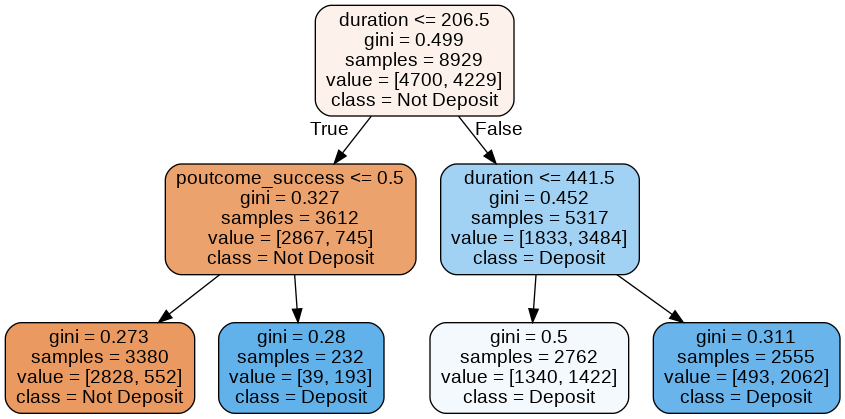

In [96]:
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

with open("tree2.dot", 'w') as f:
  f = tree.export_graphviz(dt2, out_file = f, max_depth = 2, impurity = True, #featurenames = features,
    feature_names = list(df_bank_class.drop(['deposit_cat'], axis = 1)),
    class_names = ['Not Deposit', 'Deposit'],
    rounded = True, filled = True)

check_call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png'])

img = Image.open("tree2.png")
draw = ImageDraw.Draw(img)
img.save('sample-out2.png')
PImage("sample-out2.png")

### Based on the Decision Tree results, it could be seen that higher the "duration", Bank is able to sign up more people to term deposites.

In [97]:
# Two classes: 0 = not signed up,  1 = signed up
dt2.classes_

array([0, 1])

In [98]:
# Create a Feature Vector
features = data_drop_deposite.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default_cat',
 'housing_cat',
 'loan_cat',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_success',
 'poutcome_unknown']

In [99]:
# Investigate most important Features with depth =2

dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
dt2.fit(data_train, label_train)

fi = dt2.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.849306123902405
campaign............ 0.0
previous............ 0.0
default_cat......... 0.0
housing_cat......... 0.0
loan_cat............ 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_success.... 0.15069387609759496
poutcome_unknown.... 0.0


## Predictions

In [100]:
# According to Feature importance results, most importtant Feature is the "Duration"
# Let's calculte statistics on Duration
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [101]:
# Predict: Successful deposite with a call duration = 371 sec

print(dt2.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
# column 0: probability for class 0 (not signed for term deposite) & column 1: probability for class 1
# Probability of Successful deposite = 0.51484432

[[0.48515568 0.51484432]]
[1]


In [102]:
# Predict: Successful deposite with a maximun call duration = 3881 sec

print(dt2.predict_proba(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt2.predict(np.array([0, 0, 3881, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]
[1]


In [103]:
# Get a row with poutcome_success = 1
#bank_with_dummies[(bank_with_dummies.poutcome_success == 1)]
data_drop_deposite.iloc[985]

age                      46.000000
balance                3354.000000
duration                522.000000
campaign                  1.000000
previous                  1.000000
default_cat               0.000000
housing_cat               1.000000
loan_cat                  0.000000
recent_pdays              0.005747
job_blue-collar           0.000000
job_entrepreneur          0.000000
job_other                 1.000000
job_pink-collar           0.000000
job_self-employed         0.000000
job_technician            0.000000
job_white-collar          0.000000
marital_divorced          1.000000
marital_married           0.000000
marital_single            0.000000
education_primary         0.000000
education_secondary       1.000000
education_tertiary        0.000000
education_unknown         0.000000
poutcome_failure          0.000000
poutcome_success          1.000000
poutcome_unknown          0.000000
Name: 985, dtype: float64

In [104]:
# Predict: Probability for above

print(dt2.predict_proba(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))
#print(ctree.predict(np.array([46,3354,522,1,1,0,1,0,0.005747,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0]).reshape(1, -1)))

[[0.19295499 0.80704501]]


In [105]:
# Make predictions on the test set
preds = dt2.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt2.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.7268248992386923

Area Under Curve: 
0.7880265888143609


In [0]:
######################################################################################################################################################################